In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import auth

In [ ]:
import gspread
from google.auth import default
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

In [ ]:
worksheet = gc.open('Ex1').sheet1
data = worksheet.get_all_values()

In [ ]:
dataset1=pd.DataFrame(data[1:],columns=data[0])
dataset1=dataset1.astype({'input':'float'})
dataset1=dataset1.astype({'output':'float'})
dataset1.head()

,input,output
0,1.0,1.0
1,2.0,2.0
2,3.0,3.0
3,4.0,4.0
4,5.0,5.0


In [ ]:
X = dataset1[['input']].values
y = dataset1[['output']].values
X

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [17.],
       [18.],
       [15.],
       [16.],
       [13.],
       [12.],
       [19.],
       [20.],
       [21.]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 33)


In [ ]:
Scaler = MinMaxScaler()
Scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train1 = Scaler.transform(X_train)
ai_brain=Sequential([
    Dense(8,activation='relu'),
    Dense(10,activation='relu'),
    Dense(1)
])

In [ ]:
ai_brain.compile(optimizer='rmsprop',loss='mse')
ai_brain.fit(X_train1,y_train,epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 677ms/step - loss: 123.9299
Epoch 2/200
1/1 [==============================] - 0s 10ms/step - loss: 123.1956
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 122.6629
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 122.2215
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 121.8446
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 121.5210
Epoch 7/200
1/1 [==============================] - 0s 10ms/step - loss: 121.2292
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 120.9601
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 120.6994
Epoch 10/200
1/1 [==============================] - 0s 8ms/step - loss: 120.4485
Epoch 11/200
1/1 [==============================] - 0s 8ms/step - loss: 120.2021
Epoch 12/200
1/1 [==============================] - 0s 8ms/step - loss: 119.9585
Epoch 13/200
1/1 [=============

<Axes: >

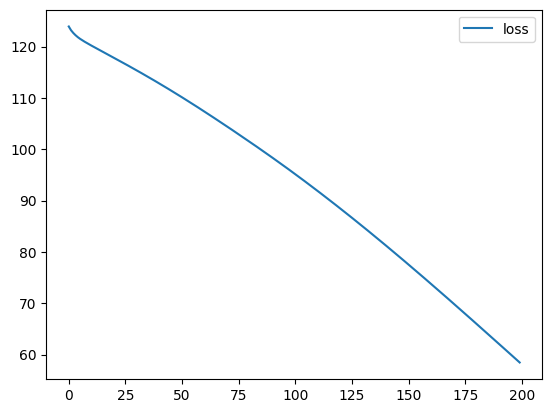

In [ ]:
loss_df = pd.DataFrame(ai_brain.history.history)
loss_df.plot()

In [ ]:
ai_brain.evaluate(X_test1,y_test)


1/1 [==============================] - 0s 138ms/step - loss: 80.5739


80.57389068603516

In [ ]:
X_test1 = Scaler.transform(X_test)
X_n1 = [[30]]
X_n1_1 = Scaler.transform(X_n1)
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 67ms/step


array([[7.5353894]], dtype=float32)